In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
classifier = Sequential()

In [3]:
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  import sys


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\training_set',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\test_set',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(33602/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(8398/500))

Found 33602 images belonging to 10 classes.
Found 8398 images belonging to 10 classes.
Epoch 1/50
67/67 [==============================] - 87s 1s/step - loss: 1.0776 - accuracy: 0.6513 - val_loss: 0.5655 - val_accuracy: 0.8369
Epoch 2/50
67/67 [==============================] - 87s 1s/step - loss: 0.5051 - accuracy: 0.8353 - val_loss: 0.2866 - val_accuracy: 0.8935
Epoch 3/50
67/67 [==============================] - 73s 1s/step - loss: 0.3731 - accuracy: 0.8832 - val_loss: 0.2208 - val_accuracy: 0.9320
Epoch 4/50
67/67 [==============================] - 69s 1s/step - loss: 0.2763 - accuracy: 0.9180 - val_loss: 0.1771 - val_accuracy: 0.9445
Epoch 5/50
67/67 [==============================] - 71s 1s/step - loss: 0.2322 - accuracy: 0.9315 - val_loss: 0.1410 - val_accuracy: 0.9562
Epoch 6/50
67/67 [==============================] - 78s 1s/step - loss: 0.1979 - accuracy: 0.9425 - val_loss: 0.1328 - val_accuracy: 0.9585
Epoch 7/50
67/67 [==============================] - 68s 1s/step - loss: 0

In [33]:
from keras.models import load_model
from keras.preprocessing import image
#from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

#trying to solve image resizing issue... channels = greyscale and there it's RGB
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(28, 28))
    #img = Image.open(img_path)
    #img1 = img.convert('L')
    #img = np.expand_dims(img, axis=-1)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

img_path = r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\WGAN_Improved\Classes\7\sample_05.JPG'
new_image = load_image(img_path)
pred = classifier.predict(new_image)

In [34]:
arr = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
m=pred[0][0]
for i in range(len(pred[0])):
    if pred[0][i]>m:
        m=pred[0][i]
        idx=i
print("I think it's a", arr[idx])
        
#I FUCKING FIXED IT! TEST_SET.CLASSINDICES BITCH!

I think it's a 7


In [14]:
test_set.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [5]:
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model.h5")
print("Saved model to disk")
 


Saved model to disk


In [37]:
# later...
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")



Loaded model from disk


In [38]:
from keras.models import load_model
from keras.preprocessing import image
#from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

#trying to solve image resizing issue... channels = greyscale and there it's RGB
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(28, 28))
    #img = Image.open(img_path)
    #img1 = img.convert('L')
    #img = np.expand_dims(img, axis=-1)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

img_path = r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\WGAN_Improved\Classes\7\sample_05.JPG'
new_image = load_image(img_path)
pred = loaded_model.predict(new_image)

In [39]:
arr = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
m=pred[0][0]
for i in range(len(pred[0])):
    if pred[0][i]>m:
        m=pred[0][i]
        idx=i
print("I think it's a", arr[idx])
        
#I FUCKING FIXED IT! TEST_SET.CLASSINDICES BITCH!

I think it's a 7


In [6]:
#CLASSIFIER 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(33602/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(8398/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
67/67 [==============================] - 66s 982ms/step - loss: 1.0528 - accuracy: 0.6596 - val_loss: 0.4601 - val_accuracy: 0.8396
Epoch 2/50
67/67 [==============================] - 66s 984ms/step - loss: 0.4962 - accuracy: 0.8449 - val_loss: 0.3887 - val_accuracy: 0.8777
Epoch 3/50
67/67 [==============================] - 65s 972ms/step - loss: 0.3654 - accuracy: 0.8902 - val_loss: 0.2912 - val_accuracy: 0.9148
Epoch 4/50
67/67 [==============================] - 63s 947ms/step - loss: 0.2750 - accuracy: 0.9194 - val_loss: 0.1915 - val_accuracy: 0.9397
Epoch 5/50
67/67 [==============================] - 61s 907ms/step - loss: 0.2122 - accuracy: 0.9402 - val_loss: 0.1651 - val_accuracy: 0.9516
Epoch 6/50
67/67 [==============================] - 67s 993ms/step - loss: 0.1788 - accuracy: 0.9496 - val_loss: 0.1595 - val_accuracy: 0.9582
Epoch 7/50
67/67 [==============================] - 63s 934ms/step - loss: 0.1539 - accuracy: 0.9570 - val_loss: 0.1298 - val_accuracy: 0.9656

In [7]:
model2 = classifier2
# serialize model to JSON
model2_json = model2.to_json()
with open(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model2.json", "w") as json_file:
    json_file.write(model2_json)
# serialize weights to HDF5
model2.save_weights(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model2.h5")
print("Saved model to disk")
 


Saved model to disk


In [8]:
#CLASSIFIER 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(33602/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(8398/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
67/67 [==============================] - 50s 747ms/step - loss: 0.9770 - accuracy: 0.6771 - val_loss: 0.4257 - val_accuracy: 0.8668
Epoch 2/50
67/67 [==============================] - 52s 774ms/step - loss: 0.3797 - accuracy: 0.8815 - val_loss: 0.1983 - val_accuracy: 0.9287
Epoch 3/50
67/67 [==============================] - 53s 798ms/step - loss: 0.2672 - accuracy: 0.9192 - val_loss: 0.1992 - val_accuracy: 0.9509
Epoch 4/50
67/67 [==============================] - 53s 794ms/step - loss: 0.1991 - accuracy: 0.9424 - val_loss: 0.1378 - val_accuracy: 0.9597
Epoch 5/50
67/67 [==============================] - 50s 744ms/step - loss: 0.1672 - accuracy: 0.9513 - val_loss: 0.1014 - val_accuracy: 0.9711
Epoch 6/50
67/67 [==============================] - 48s 716ms/step - loss: 0.1429 - accuracy: 0.9584 - val_loss: 0.0685 - val_accuracy: 0.9720
Epoch 7/50
67/67 [==============================] - 49s 732ms/step - loss: 0.1231 - accuracy: 0.9635 - val_loss: 0.1145 - val_accuracy: 0.9733

In [9]:
model3 = classifier3
# serialize model to JSON
model3_json = model3.to_json()
with open(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model3.json", "w") as json_file:
    json_file.write(model3_json)
# serialize weights to HDF5
model3.save_weights(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model3.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
#CLASSIFIER 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(33602/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(8398/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
67/67 [==============================] - 49s 730ms/step - loss: 0.7524 - accuracy: 0.7577 - val_loss: 0.2835 - val_accuracy: 0.9065
Epoch 2/50
67/67 [==============================] - 48s 721ms/step - loss: 0.2590 - accuracy: 0.9218 - val_loss: 0.1856 - val_accuracy: 0.9516
Epoch 3/50
67/67 [==============================] - 48s 718ms/step - loss: 0.1761 - accuracy: 0.9493 - val_loss: 0.1367 - val_accuracy: 0.9649
Epoch 4/50
67/67 [==============================] - 47s 694ms/step - loss: 0.1294 - accuracy: 0.9654 - val_loss: 0.0838 - val_accuracy: 0.9721
Epoch 5/50
67/67 [==============================] - 47s 702ms/step - loss: 0.1071 - accuracy: 0.9708 - val_loss: 0.1136 - val_accuracy: 0.9751
Epoch 6/50
67/67 [==============================] - 49s 726ms/step - loss: 0.0906 - accuracy: 0.9752 - val_loss: 0.0746 - val_accuracy: 0.9783
Epoch 7/50
67/67 [==============================] - 47s 707ms/step - loss: 0.0801 - accuracy: 0.9778 - val_loss: 0.0690 - val_accuracy: 0.9782

In [11]:
model4 = classifier4
# serialize model to JSON
model4_json = model4.to_json()
with open(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model4.json", "w") as json_file:
    json_file.write(model4_json)
# serialize weights to HDF5
model4.save_weights(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model4.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
#CLASSIFIER 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(33602/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(8398/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
67/67 [==============================] - 59s 887ms/step - loss: 0.7992 - accuracy: 0.7505 - val_loss: 0.3400 - val_accuracy: 0.8921
Epoch 2/50
67/67 [==============================] - 63s 933ms/step - loss: 0.3334 - accuracy: 0.8980 - val_loss: 0.2215 - val_accuracy: 0.9354
Epoch 3/50
67/67 [==============================] - 62s 928ms/step - loss: 0.2222 - accuracy: 0.9349 - val_loss: 0.1515 - val_accuracy: 0.9539
Epoch 4/50
67/67 [==============================] - 63s 936ms/step - loss: 0.1767 - accuracy: 0.9491 - val_loss: 0.1448 - val_accuracy: 0.9592
Epoch 5/50
67/67 [==============================] - 62s 918ms/step - loss: 0.1448 - accuracy: 0.9583 - val_loss: 0.0932 - val_accuracy: 0.9701
Epoch 6/50
67/67 [==============================] - 62s 929ms/step - loss: 0.1211 - accuracy: 0.9658 - val_loss: 0.1119 - val_accuracy: 0.9725
Epoch 7/50
67/67 [==============================] - 61s 912ms/step - loss: 0.1062 - accuracy: 0.9709 - val_loss: 0.0931 - val_accuracy: 0.9719

In [13]:
model5 = classifier5
# serialize model to JSON
model5_json = model5.to_json()
with open(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model5.json", "w") as json_file:
    json_file.write(model5_json)
# serialize weights to HDF5
model5.save_weights(r"C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\model5.h5")
print("Saved model to disk")

Saved model to disk


In [8]:
#FOR WGAN_IMPROVED
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\WGAN_Improved\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 10055 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [9]:
#Classifier 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


In [10]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10055/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(8398/500))

Epoch 1/50
20/20 [==============================] - 29s 1s/step - loss: 1.8287 - accuracy: 0.3818 - val_loss: 1.2981 - val_accuracy: 0.6045
Epoch 2/50
20/20 [==============================] - 25s 1s/step - loss: 1.1734 - accuracy: 0.6092 - val_loss: 0.7007 - val_accuracy: 0.7895
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.9380 - accuracy: 0.6807 - val_loss: 0.5464 - val_accuracy: 0.8160
Epoch 4/50
20/20 [==============================] - 26s 1s/step - loss: 0.8697 - accuracy: 0.7009 - val_loss: 0.5460 - val_accuracy: 0.8275
Epoch 5/50
20/20 [==============================] - 25s 1s/step - loss: 0.7678 - accuracy: 0.7350 - val_loss: 0.4053 - val_accuracy: 0.8760
Epoch 6/50
20/20 [==============================] - 25s 1s/step - loss: 0.7064 - accuracy: 0.7486 - val_loss: 0.4563 - val_accuracy: 0.8590
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 0.6611 - accuracy: 0.7660 - val_loss: 0.3764 - val_accuracy: 0.8815
Epoch 8/50
20/20 [==

In [11]:
path=r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\\'
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan_improved1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan_improved1.h5")
print("Saved model to disk")



Saved model to disk


In [12]:
#WGAN Improved
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10055/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 24s 1s/step - loss: 1.9014 - accuracy: 0.3718 - val_loss: 0.9797 - val_accuracy: 0.7265
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 1.1693 - accuracy: 0.6072 - val_loss: 0.7227 - val_accuracy: 0.7925
Epoch 3/50
20/20 [==============================] - 22s 1s/step - loss: 0.9564 - accuracy: 0.6736 - val_loss: 0.6474 - val_accuracy: 0.8210
Epoch 4/50
20/20 [==============================] - 22s 1s/step - loss: 0.8422 - accuracy: 0.7193 - val_loss: 0.5995 - val_accuracy: 0.8250
Epoch 5/50
20/20 [==============================] - 25s 1s/step - loss: 0.7881 - accuracy: 0.7347 - val_loss: 0.5430 - val_accuracy: 0.8385
Epoch 6/50
20/20 [==============================] - 22s 1s/step - loss: 0.7300 - accuracy: 0.7490 - val_loss: 0.4433 - val_accuracy: 0.8690
Epoch 7/50
20/20 [==============================] - 22s 1s/step - loss: 0.6728 - accuracy: 0.7624 - val_loss: 0.4220 - val_accuracy: 0.8690
Epoch 8/50
20/20 [==

In [14]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan_improved2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan_improved2.h5")
print("Saved model to disk")


Saved model to disk


In [15]:
#WGAN Improved
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10055/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 17s 833ms/step - loss: 1.8527 - accuracy: 0.3673 - val_loss: 1.0857 - val_accuracy: 0.6925
Epoch 2/50
20/20 [==============================] - 18s 924ms/step - loss: 1.0469 - accuracy: 0.6334 - val_loss: 0.6509 - val_accuracy: 0.8150
Epoch 3/50
20/20 [==============================] - 18s 917ms/step - loss: 0.8338 - accuracy: 0.7077 - val_loss: 0.4695 - val_accuracy: 0.8575
Epoch 4/50
20/20 [==============================] - 18s 915ms/step - loss: 0.7613 - accuracy: 0.7323 - val_loss: 0.3898 - val_accuracy: 0.8760
Epoch 5/50
20/20 [==============================] - 18s 910ms/step - loss: 0.6745 - accuracy: 0.7644 - val_loss: 0.4548 - val_accuracy: 0.8700
Epoch 6/50
20/20 [==============================] - 18s 910ms/step - loss: 0.6289 - accuracy: 0.7810 - val_loss: 0.3488 - val_accuracy: 0.8885
Epoch 7/50
20/20 [==============================] - 18s 914ms/step - loss: 0.5965 - accuracy: 0.7912 - val_loss: 0.2931 - val_accuracy: 0.9060

In [16]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan_improved3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan_improved3.h5")
print("Saved model to disk")


Saved model to disk


In [17]:
#WGAN Improved 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10055/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 21s 1s/step - loss: 1.6642 - accuracy: 0.4804 - val_loss: 0.7928 - val_accuracy: 0.7405
Epoch 2/50
20/20 [==============================] - 19s 953ms/step - loss: 0.8904 - accuracy: 0.6970 - val_loss: 0.5534 - val_accuracy: 0.8490
Epoch 3/50
20/20 [==============================] - 20s 986ms/step - loss: 0.7317 - accuracy: 0.7454 - val_loss: 0.4568 - val_accuracy: 0.8550
Epoch 4/50
20/20 [==============================] - 18s 915ms/step - loss: 0.6351 - accuracy: 0.7713 - val_loss: 0.3979 - val_accuracy: 0.8720
Epoch 5/50
20/20 [==============================] - 18s 880ms/step - loss: 0.5706 - accuracy: 0.7965 - val_loss: 0.3144 - val_accuracy: 0.8930
Epoch 6/50
20/20 [==============================] - 19s 971ms/step - loss: 0.5241 - accuracy: 0.8179 - val_loss: 0.2825 - val_accuracy: 0.9040
Epoch 7/50
20/20 [==============================] - 20s 984ms/step - loss: 0.4809 - accuracy: 0.8269 - val_loss: 0.2615 - val_accuracy: 0.9130
Ep

In [18]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan_improved4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan_improved4.h5")
print("Saved model to disk")


Saved model to disk


In [19]:
#WGAN Improved 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10055/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 16s 786ms/step - loss: 1.5626 - accuracy: 0.5042 - val_loss: 0.6523 - val_accuracy: 0.7815
Epoch 2/50
20/20 [==============================] - 17s 848ms/step - loss: 0.8351 - accuracy: 0.7190 - val_loss: 0.5214 - val_accuracy: 0.8500
Epoch 3/50
20/20 [==============================] - 16s 817ms/step - loss: 0.7325 - accuracy: 0.7499 - val_loss: 0.4508 - val_accuracy: 0.8650
Epoch 4/50
20/20 [==============================] - 16s 819ms/step - loss: 0.6304 - accuracy: 0.7780 - val_loss: 0.3833 - val_accuracy: 0.8875
Epoch 5/50
20/20 [==============================] - 15s 751ms/step - loss: 0.5453 - accuracy: 0.7993 - val_loss: 0.3289 - val_accuracy: 0.8885
Epoch 6/50
20/20 [==============================] - 16s 784ms/step - loss: 0.5213 - accuracy: 0.8128 - val_loss: 0.2849 - val_accuracy: 0.9060
Epoch 7/50
20/20 [==============================] - 16s 808ms/step - loss: 0.4883 - accuracy: 0.8291 - val_loss: 0.2550 - val_accuracy: 0.9015

In [20]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan_improved5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan_improved5.h5")
print("Saved model to disk")


Saved model to disk


In [21]:
#NOW FOR WGAN
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\WGAN Images\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [22]:
#WGAN 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 84s 4s/step - loss: 2.0416 - accuracy: 0.2747 - val_loss: 1.4868 - val_accuracy: 0.4940
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 1.6369 - accuracy: 0.4197 - val_loss: 1.1394 - val_accuracy: 0.6250
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 1.4823 - accuracy: 0.4594 - val_loss: 1.0821 - val_accuracy: 0.6515
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 1.3808 - accuracy: 0.4977 - val_loss: 0.7746 - val_accuracy: 0.7595
Epoch 5/50
20/20 [==============================] - 26s 1s/step - loss: 1.3144 - accuracy: 0.5231 - val_loss: 0.8601 - val_accuracy: 0.7420
Epoch 6/50
20/20 [==============================] - 25s 1s/step - loss: 1.2860 - accuracy: 0.5283 - val_loss: 0.9068 - val_accuracy: 0.7275
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 1.2289 - accuracy: 0.5522 - val_loss: 0.5350 - val_accuracy: 0.8330
Epoch 8/50
20/20 [==

In [23]:
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan1.h5")
print("Saved model to disk")


Saved model to disk


In [24]:
#WGAN 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 23s 1s/step - loss: 2.0007 - accuracy: 0.2730 - val_loss: 1.5557 - val_accuracy: 0.4510
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 1.6445 - accuracy: 0.4173 - val_loss: 1.0458 - val_accuracy: 0.6475
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 1.4519 - accuracy: 0.4676 - val_loss: 0.8718 - val_accuracy: 0.7275
Epoch 4/50
20/20 [==============================] - 27s 1s/step - loss: 1.3732 - accuracy: 0.5053 - val_loss: 0.7930 - val_accuracy: 0.7610
Epoch 5/50
20/20 [==============================] - 24s 1s/step - loss: 1.2934 - accuracy: 0.5275 - val_loss: 0.7081 - val_accuracy: 0.8020
Epoch 6/50
20/20 [==============================] - 24s 1s/step - loss: 1.2619 - accuracy: 0.5407 - val_loss: 0.6199 - val_accuracy: 0.8220
Epoch 7/50
20/20 [==============================] - 26s 1s/step - loss: 1.1912 - accuracy: 0.5630 - val_loss: 0.6389 - val_accuracy: 0.7650
Epoch 8/50
20/20 [==

In [25]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan2.h5")
print("Saved model to disk")


Saved model to disk


In [26]:
#WGAN 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 19s 943ms/step - loss: 2.0869 - accuracy: 0.2549 - val_loss: 1.5094 - val_accuracy: 0.4950
Epoch 2/50
20/20 [==============================] - 19s 931ms/step - loss: 1.6312 - accuracy: 0.4138 - val_loss: 1.0727 - val_accuracy: 0.6300
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 1.4428 - accuracy: 0.4711 - val_loss: 0.8273 - val_accuracy: 0.7320
Epoch 4/50
20/20 [==============================] - 19s 949ms/step - loss: 1.3309 - accuracy: 0.5105 - val_loss: 0.6965 - val_accuracy: 0.7810
Epoch 5/50
20/20 [==============================] - 19s 954ms/step - loss: 1.2620 - accuracy: 0.5397 - val_loss: 0.6389 - val_accuracy: 0.8195
Epoch 6/50
20/20 [==============================] - 22s 1s/step - loss: 1.1836 - accuracy: 0.5676 - val_loss: 0.5087 - val_accuracy: 0.8420
Epoch 7/50
20/20 [==============================] - 21s 1s/step - loss: 1.1165 - accuracy: 0.5882 - val_loss: 0.4431 - val_accuracy: 0.8605
Epoch 8/

In [27]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan3.h5")
print("Saved model to disk")


Saved model to disk


In [28]:
#WGAN 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 18s 908ms/step - loss: 1.8738 - accuracy: 0.3431 - val_loss: 1.0556 - val_accuracy: 0.6395
Epoch 2/50
20/20 [==============================] - 18s 902ms/step - loss: 1.3618 - accuracy: 0.5052 - val_loss: 0.7607 - val_accuracy: 0.7355
Epoch 3/50
20/20 [==============================] - 18s 899ms/step - loss: 1.2062 - accuracy: 0.5612 - val_loss: 0.5512 - val_accuracy: 0.8345
Epoch 4/50
20/20 [==============================] - 18s 909ms/step - loss: 1.0711 - accuracy: 0.6053 - val_loss: 0.4729 - val_accuracy: 0.8370
Epoch 5/50
20/20 [==============================] - 18s 916ms/step - loss: 0.9836 - accuracy: 0.6352 - val_loss: 0.4008 - val_accuracy: 0.8605
Epoch 6/50
20/20 [==============================] - 18s 898ms/step - loss: 0.9126 - accuracy: 0.6667 - val_loss: 0.3952 - val_accuracy: 0.8845
Epoch 7/50
20/20 [==============================] - 19s 961ms/step - loss: 0.8501 - accuracy: 0.6849 - val_loss: 0.3352 - val_accuracy: 0.8915

In [29]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan4.h5")
print("Saved model to disk")


Saved model to disk


In [30]:
#WGAN 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 17s 836ms/step - loss: 1.8306 - accuracy: 0.3528 - val_loss: 1.0660 - val_accuracy: 0.6250
Epoch 2/50
20/20 [==============================] - 17s 835ms/step - loss: 1.3607 - accuracy: 0.5030 - val_loss: 0.7507 - val_accuracy: 0.7525
Epoch 3/50
20/20 [==============================] - 17s 829ms/step - loss: 1.2234 - accuracy: 0.5568 - val_loss: 0.6401 - val_accuracy: 0.8085
Epoch 4/50
20/20 [==============================] - 16s 821ms/step - loss: 1.1179 - accuracy: 0.5960 - val_loss: 0.5247 - val_accuracy: 0.8470
Epoch 5/50
20/20 [==============================] - 16s 818ms/step - loss: 1.0321 - accuracy: 0.6209 - val_loss: 0.4270 - val_accuracy: 0.8580
Epoch 6/50
20/20 [==============================] - 17s 829ms/step - loss: 0.9624 - accuracy: 0.6460 - val_loss: 0.4066 - val_accuracy: 0.8760
Epoch 7/50
20/20 [==============================] - 16s 816ms/step - loss: 0.9009 - accuracy: 0.6660 - val_loss: 0.2758 - val_accuracy: 0.8950

In [31]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"wgan5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"wgan5.h5")
print("Saved model to disk")

Saved model to disk


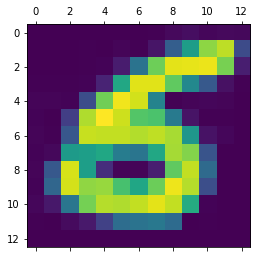

In [44]:
#trying something
from keras import models
from keras.preprocessing import image
import imageio as im
import matplotlib.pyplot as plt

img_path = r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse\5\img_33485.jpg'
img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.


layer_outputs = [layer.output for layer in classifier5.layers[:4]]
activation_model = models.Model(inputs=classifier5.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor) 

first_layer_activation = activations[1]
#print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [ ]:
#NOW FOR SGAN
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\SGAN Images\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

In [45]:
#SGAN 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10058/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 27s 1s/step - loss: 2.0168 - accuracy: 0.2597 - val_loss: 1.5696 - val_accuracy: 0.5390
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 1.6408 - accuracy: 0.4208 - val_loss: 1.0585 - val_accuracy: 0.6785
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 1.4629 - accuracy: 0.4643 - val_loss: 0.8492 - val_accuracy: 0.7420
Epoch 4/50
20/20 [==============================] - 22s 1s/step - loss: 1.3852 - accuracy: 0.4943 - val_loss: 0.7708 - val_accuracy: 0.7445
Epoch 5/50
20/20 [==============================] - 20s 1s/step - loss: 1.2981 - accuracy: 0.5254 - val_loss: 0.6472 - val_accuracy: 0.8050
Epoch 6/50
20/20 [==============================] - 21s 1s/step - loss: 1.2571 - accuracy: 0.5388 - val_loss: 0.7804 - val_accuracy: 0.7470
Epoch 7/50
20/20 [==============================] - 21s 1s/step - loss: 1.1727 - accuracy: 0.5668 - val_loss: 0.5658 - val_accuracy: 0.8240
Epoch 8/50
20/20 [==

In [47]:
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(path+"sgan1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"sgan1.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
#SGAN 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10058/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 19s 968ms/step - loss: 2.0130 - accuracy: 0.2789 - val_loss: 1.3602 - val_accuracy: 0.5320
Epoch 2/50
20/20 [==============================] - 20s 1s/step - loss: 1.6283 - accuracy: 0.4165 - val_loss: 0.9856 - val_accuracy: 0.7045
Epoch 3/50
20/20 [==============================] - 22s 1s/step - loss: 1.4504 - accuracy: 0.4718 - val_loss: 0.8890 - val_accuracy: 0.6985
Epoch 4/50
20/20 [==============================] - 19s 961ms/step - loss: 1.3339 - accuracy: 0.5148 - val_loss: 0.8159 - val_accuracy: 0.7235
Epoch 5/50
20/20 [==============================] - 19s 959ms/step - loss: 1.2733 - accuracy: 0.5380 - val_loss: 0.7097 - val_accuracy: 0.7800
Epoch 6/50
20/20 [==============================] - 19s 959ms/step - loss: 1.2339 - accuracy: 0.5463 - val_loss: 0.6110 - val_accuracy: 0.8175
Epoch 7/50
20/20 [==============================] - 19s 961ms/step - loss: 1.1552 - accuracy: 0.5755 - val_loss: 0.5617 - val_accuracy: 0.8345
Epoch

In [49]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"sgan2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"sgan2.h5")
print("Saved model to disk")

Saved model to disk


In [50]:
#SGAN 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10058/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 19s 963ms/step - loss: 2.1414 - accuracy: 0.2254 - val_loss: 1.6140 - val_accuracy: 0.5010
Epoch 2/50
20/20 [==============================] - 19s 939ms/step - loss: 1.6483 - accuracy: 0.4126 - val_loss: 1.0535 - val_accuracy: 0.6450
Epoch 3/50
20/20 [==============================] - 19s 951ms/step - loss: 1.4236 - accuracy: 0.4850 - val_loss: 0.7615 - val_accuracy: 0.7445
Epoch 4/50
20/20 [==============================] - 19s 944ms/step - loss: 1.3434 - accuracy: 0.5094 - val_loss: 0.6907 - val_accuracy: 0.7805
Epoch 5/50
20/20 [==============================] - 19s 945ms/step - loss: 1.2453 - accuracy: 0.5363 - val_loss: 0.6526 - val_accuracy: 0.8000
Epoch 6/50
20/20 [==============================] - 19s 946ms/step - loss: 1.1857 - accuracy: 0.5665 - val_loss: 0.4872 - val_accuracy: 0.8480
Epoch 7/50
20/20 [==============================] - 19s 948ms/step - loss: 1.1231 - accuracy: 0.5906 - val_loss: 0.4908 - val_accuracy: 0.8440

In [51]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"sgan3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"sgan3.h5")
print("Saved model to disk")

Saved model to disk


In [52]:
#SGAN 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10058/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 18s 901ms/step - loss: 1.8984 - accuracy: 0.3384 - val_loss: 0.9964 - val_accuracy: 0.6480
Epoch 2/50
20/20 [==============================] - 18s 924ms/step - loss: 1.3595 - accuracy: 0.5052 - val_loss: 0.7892 - val_accuracy: 0.7325
Epoch 3/50
20/20 [==============================] - 18s 905ms/step - loss: 1.2104 - accuracy: 0.5606 - val_loss: 0.6321 - val_accuracy: 0.8110
Epoch 4/50
20/20 [==============================] - 18s 908ms/step - loss: 1.0698 - accuracy: 0.6068 - val_loss: 0.4326 - val_accuracy: 0.8605
Epoch 5/50
20/20 [==============================] - 18s 921ms/step - loss: 0.9681 - accuracy: 0.6414 - val_loss: 0.3750 - val_accuracy: 0.8905
Epoch 6/50
20/20 [==============================] - 18s 902ms/step - loss: 0.8843 - accuracy: 0.6708 - val_loss: 0.3383 - val_accuracy: 0.9010
Epoch 7/50
20/20 [==============================] - 18s 903ms/step - loss: 0.8273 - accuracy: 0.6948 - val_loss: 0.2744 - val_accuracy: 0.8915

In [53]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"sgan4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"sgan4.h5")
print("Saved model to disk")

Saved model to disk


In [54]:
#SGAN 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10058/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 17s 837ms/step - loss: 1.9573 - accuracy: 0.3208 - val_loss: 1.0910 - val_accuracy: 0.6410
Epoch 2/50
20/20 [==============================] - 16s 818ms/step - loss: 1.4008 - accuracy: 0.4929 - val_loss: 0.8006 - val_accuracy: 0.7470
Epoch 3/50
20/20 [==============================] - 16s 823ms/step - loss: 1.2460 - accuracy: 0.5528 - val_loss: 0.6715 - val_accuracy: 0.8085
Epoch 4/50
20/20 [==============================] - 16s 824ms/step - loss: 1.1174 - accuracy: 0.5927 - val_loss: 0.5363 - val_accuracy: 0.8315
Epoch 5/50
20/20 [==============================] - 17s 826ms/step - loss: 1.0133 - accuracy: 0.6251 - val_loss: 0.3760 - val_accuracy: 0.8785
Epoch 6/50
20/20 [==============================] - 16s 821ms/step - loss: 0.9457 - accuracy: 0.6520 - val_loss: 0.3841 - val_accuracy: 0.8895
Epoch 7/50
20/20 [==============================] - 17s 830ms/step - loss: 0.8956 - accuracy: 0.6696 - val_loss: 0.3087 - val_accuracy: 0.8875

In [55]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"sgan5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"sgan5.h5")
print("Saved model to disk")

Saved model to disk


In [56]:
#NOW FOR LSGAN
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\LSGAN Images\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [57]:
#LSGAN 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 40s 2s/step - loss: 1.7469 - accuracy: 0.4226 - val_loss: 1.1661 - val_accuracy: 0.5995
Epoch 2/50
20/20 [==============================] - 25s 1s/step - loss: 1.0618 - accuracy: 0.6374 - val_loss: 0.7139 - val_accuracy: 0.7785
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.8736 - accuracy: 0.6984 - val_loss: 0.5595 - val_accuracy: 0.8175
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 0.7824 - accuracy: 0.7267 - val_loss: 0.5285 - val_accuracy: 0.8370
Epoch 5/50
20/20 [==============================] - 24s 1s/step - loss: 0.7124 - accuracy: 0.7510 - val_loss: 0.5180 - val_accuracy: 0.8280
Epoch 6/50
20/20 [==============================] - 24s 1s/step - loss: 0.6728 - accuracy: 0.7605 - val_loss: 0.5393 - val_accuracy: 0.8375
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 0.6243 - accuracy: 0.7800 - val_loss: 0.3896 - val_accuracy: 0.8450
Epoch 8/50
20/20 [==

In [58]:
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(path+"lsgan1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"lsgan1.h5")
print("Saved model to disk")

Saved model to disk


In [59]:
#LSGAN 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 23s 1s/step - loss: 1.7498 - accuracy: 0.4066 - val_loss: 1.1002 - val_accuracy: 0.6540
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 1.0674 - accuracy: 0.6382 - val_loss: 0.7432 - val_accuracy: 0.7815
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 0.8924 - accuracy: 0.6889 - val_loss: 0.6418 - val_accuracy: 0.8000
Epoch 4/50
20/20 [==============================] - 23s 1s/step - loss: 0.7901 - accuracy: 0.7332 - val_loss: 0.5541 - val_accuracy: 0.8240
Epoch 5/50
20/20 [==============================] - 23s 1s/step - loss: 0.7202 - accuracy: 0.7451 - val_loss: 0.4977 - val_accuracy: 0.8440
Epoch 6/50
20/20 [==============================] - 23s 1s/step - loss: 0.6674 - accuracy: 0.7720 - val_loss: 0.4482 - val_accuracy: 0.8640
Epoch 7/50
20/20 [==============================] - 22s 1s/step - loss: 0.6593 - accuracy: 0.7699 - val_loss: 0.4598 - val_accuracy: 0.8560
Epoch 8/50
20/20 [==

In [67]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"lsgan2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"lsgan2.h5")
print("Saved model to disk")

Saved model to disk


In [68]:
#LSGAN 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 21s 1s/step - loss: 1.8441 - accuracy: 0.3884 - val_loss: 1.1270 - val_accuracy: 0.5855
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 1.0093 - accuracy: 0.6483 - val_loss: 0.7144 - val_accuracy: 0.7465
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 0.8021 - accuracy: 0.7172 - val_loss: 0.5662 - val_accuracy: 0.8230
Epoch 4/50
20/20 [==============================] - 25s 1s/step - loss: 0.7140 - accuracy: 0.7563 - val_loss: 0.4417 - val_accuracy: 0.8385
Epoch 5/50
20/20 [==============================] - 21s 1s/step - loss: 0.6154 - accuracy: 0.7831 - val_loss: 0.5261 - val_accuracy: 0.8235
Epoch 6/50
20/20 [==============================] - 19s 956ms/step - loss: 0.5983 - accuracy: 0.7913 - val_loss: 0.3384 - val_accuracy: 0.8850
Epoch 7/50
20/20 [==============================] - 19s 937ms/step - loss: 0.5537 - accuracy: 0.8034 - val_loss: 0.3703 - val_accuracy: 0.8775
Epoch 8/50
20/

In [62]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"lsgan3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"lsgan3.h5")
print("Saved model to disk")

Saved model to disk


In [63]:
#LSGAN 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 18s 905ms/step - loss: 1.5285 - accuracy: 0.4935 - val_loss: 0.6991 - val_accuracy: 0.7675
Epoch 2/50
20/20 [==============================] - 18s 903ms/step - loss: 0.7672 - accuracy: 0.7351 - val_loss: 0.5217 - val_accuracy: 0.8200
Epoch 3/50
20/20 [==============================] - 18s 896ms/step - loss: 0.6396 - accuracy: 0.7769 - val_loss: 0.4027 - val_accuracy: 0.8595
Epoch 4/50
20/20 [==============================] - 18s 891ms/step - loss: 0.5480 - accuracy: 0.8080 - val_loss: 0.3311 - val_accuracy: 0.8740
Epoch 5/50
20/20 [==============================] - 18s 893ms/step - loss: 0.4888 - accuracy: 0.8243 - val_loss: 0.3435 - val_accuracy: 0.9015
Epoch 6/50
20/20 [==============================] - 18s 898ms/step - loss: 0.4488 - accuracy: 0.8439 - val_loss: 0.2525 - val_accuracy: 0.9075
Epoch 7/50
20/20 [==============================] - 18s 895ms/step - loss: 0.4034 - accuracy: 0.8599 - val_loss: 0.2566 - val_accuracy: 0.9135

In [64]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"lsgan4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"lsgan4.h5")
print("Saved model to disk")

Saved model to disk


In [65]:
#LSGAN 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 17s 826ms/step - loss: 1.7186 - accuracy: 0.4543 - val_loss: 0.8365 - val_accuracy: 0.7415
Epoch 2/50
20/20 [==============================] - 16s 822ms/step - loss: 0.8338 - accuracy: 0.7168 - val_loss: 0.5547 - val_accuracy: 0.8280
Epoch 3/50
20/20 [==============================] - 16s 825ms/step - loss: 0.6649 - accuracy: 0.7673 - val_loss: 0.4202 - val_accuracy: 0.8510
Epoch 4/50
20/20 [==============================] - 17s 835ms/step - loss: 0.5879 - accuracy: 0.7954 - val_loss: 0.3674 - val_accuracy: 0.8715
Epoch 5/50
20/20 [==============================] - 16s 823ms/step - loss: 0.5289 - accuracy: 0.8141 - val_loss: 0.3219 - val_accuracy: 0.8800
Epoch 6/50
20/20 [==============================] - 17s 827ms/step - loss: 0.4941 - accuracy: 0.8259 - val_loss: 0.3227 - val_accuracy: 0.8925
Epoch 7/50
20/20 [==============================] - 17s 827ms/step - loss: 0.4583 - accuracy: 0.8373 - val_loss: 0.3089 - val_accuracy: 0.9125

In [66]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"lsgan5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"lsgan5.h5")
print("Saved model to disk")

Saved model to disk


In [2]:
#NOW FOR GAN
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\GAN Images\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [3]:
#GAN 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 30s 2s/step - loss: 1.8635 - accuracy: 0.3619 - val_loss: 1.2570 - val_accuracy: 0.5645
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 1.0658 - accuracy: 0.6427 - val_loss: 0.8279 - val_accuracy: 0.7395
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.8203 - accuracy: 0.7277 - val_loss: 0.6754 - val_accuracy: 0.8060
Epoch 4/50
20/20 [==============================] - 26s 1s/step - loss: 0.7592 - accuracy: 0.7442 - val_loss: 0.4912 - val_accuracy: 0.8400
Epoch 5/50
20/20 [==============================] - 26s 1s/step - loss: 0.6728 - accuracy: 0.7696 - val_loss: 0.5052 - val_accuracy: 0.8315
Epoch 6/50
20/20 [==============================] - 25s 1s/step - loss: 0.6318 - accuracy: 0.7843 - val_loss: 0.4891 - val_accuracy: 0.8505
Epoch 7/50
20/20 [==============================] - 25s 1s/step - loss: 0.5970 - accuracy: 0.7976 - val_loss: 0.4312 - val_accuracy: 0.8585
Epoch 8/50
20/20 [==

In [4]:
path=r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\\'
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(path+"gan1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"gan1.h5")
print("Saved model to disk")

Saved model to disk


In [71]:
#GAN 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 25s 1s/step - loss: 1.7949 - accuracy: 0.3899 - val_loss: 1.1425 - val_accuracy: 0.6605
Epoch 2/50
20/20 [==============================] - 24s 1s/step - loss: 1.0571 - accuracy: 0.6595 - val_loss: 0.8988 - val_accuracy: 0.7365
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 0.8271 - accuracy: 0.7163 - val_loss: 0.6559 - val_accuracy: 0.7960
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 0.7506 - accuracy: 0.7464 - val_loss: 0.5064 - val_accuracy: 0.8375
Epoch 5/50
20/20 [==============================] - 25s 1s/step - loss: 0.6580 - accuracy: 0.7781 - val_loss: 0.6549 - val_accuracy: 0.8095
Epoch 6/50
20/20 [==============================] - 23s 1s/step - loss: 0.6336 - accuracy: 0.7850 - val_loss: 0.5222 - val_accuracy: 0.8300
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 0.5923 - accuracy: 0.7982 - val_loss: 0.3973 - val_accuracy: 0.8615
Epoch 8/50
20/20 [==

In [72]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"gan2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"gan2.h5")
print("Saved model to disk")

Saved model to disk


In [73]:
#GAN 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 19s 966ms/step - loss: 1.8434 - accuracy: 0.3885 - val_loss: 0.8757 - val_accuracy: 0.7080
Epoch 2/50
20/20 [==============================] - 19s 951ms/step - loss: 0.9638 - accuracy: 0.6784 - val_loss: 0.6788 - val_accuracy: 0.7685
Epoch 3/50
20/20 [==============================] - 19s 966ms/step - loss: 0.7700 - accuracy: 0.7365 - val_loss: 0.5207 - val_accuracy: 0.8350
Epoch 4/50
20/20 [==============================] - 19s 956ms/step - loss: 0.6757 - accuracy: 0.7658 - val_loss: 0.5692 - val_accuracy: 0.7990
Epoch 5/50
20/20 [==============================] - 19s 951ms/step - loss: 0.6176 - accuracy: 0.7867 - val_loss: 0.3751 - val_accuracy: 0.8760
Epoch 6/50
20/20 [==============================] - 19s 948ms/step - loss: 0.5689 - accuracy: 0.8026 - val_loss: 0.5023 - val_accuracy: 0.8435
Epoch 7/50
20/20 [==============================] - 19s 967ms/step - loss: 0.5272 - accuracy: 0.8148 - val_loss: 0.3275 - val_accuracy: 0.8855

In [74]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"gan3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"gan3.h5")
print("Saved model to disk")

Saved model to disk


In [75]:
#GAN 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 22s 1s/step - loss: 1.5949 - accuracy: 0.4889 - val_loss: 0.6710 - val_accuracy: 0.7650
Epoch 2/50
20/20 [==============================] - 18s 915ms/step - loss: 0.7793 - accuracy: 0.7401 - val_loss: 0.5871 - val_accuracy: 0.8120
Epoch 3/50
20/20 [==============================] - 18s 918ms/step - loss: 0.6288 - accuracy: 0.7902 - val_loss: 0.4337 - val_accuracy: 0.8665
Epoch 4/50
20/20 [==============================] - 19s 948ms/step - loss: 0.5427 - accuracy: 0.8149 - val_loss: 0.4312 - val_accuracy: 0.8740
Epoch 5/50
20/20 [==============================] - 19s 964ms/step - loss: 0.4684 - accuracy: 0.8390 - val_loss: 0.3262 - val_accuracy: 0.8960
Epoch 6/50
20/20 [==============================] - 19s 931ms/step - loss: 0.4202 - accuracy: 0.8541 - val_loss: 0.2906 - val_accuracy: 0.9030
Epoch 7/50
20/20 [==============================] - 20s 1s/step - loss: 0.3774 - accuracy: 0.8693 - val_loss: 0.2994 - val_accuracy: 0.9145
Epoch

In [76]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"gan4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"gan4.h5")
print("Saved model to disk")

Saved model to disk


In [77]:
#GAN 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 17s 868ms/step - loss: 1.3755 - accuracy: 0.5576 - val_loss: 0.6805 - val_accuracy: 0.8015
Epoch 2/50
20/20 [==============================] - 17s 872ms/step - loss: 0.7296 - accuracy: 0.7574 - val_loss: 0.5186 - val_accuracy: 0.8210
Epoch 3/50
20/20 [==============================] - 18s 892ms/step - loss: 0.6175 - accuracy: 0.7906 - val_loss: 0.4034 - val_accuracy: 0.8465
Epoch 4/50
20/20 [==============================] - 18s 912ms/step - loss: 0.5371 - accuracy: 0.8162 - val_loss: 0.3938 - val_accuracy: 0.8740
Epoch 5/50
20/20 [==============================] - 17s 856ms/step - loss: 0.4739 - accuracy: 0.8361 - val_loss: 0.3562 - val_accuracy: 0.8855
Epoch 6/50
20/20 [==============================] - 17s 860ms/step - loss: 0.4439 - accuracy: 0.8468 - val_loss: 0.2965 - val_accuracy: 0.8935
Epoch 7/50
20/20 [==============================] - 18s 904ms/step - loss: 0.4075 - accuracy: 0.8596 - val_loss: 0.2844 - val_accuracy: 0.9080

In [78]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"gan5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"gan5.h5")
print("Saved model to disk")

Saved model to disk


In [79]:
#NOW FOR DCGAN
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\DCGAN Images\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [80]:
#DCGAN 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 31s 2s/step - loss: 1.8027 - accuracy: 0.4182 - val_loss: 0.9997 - val_accuracy: 0.6840
Epoch 2/50
20/20 [==============================] - 26s 1s/step - loss: 1.1156 - accuracy: 0.6283 - val_loss: 0.8032 - val_accuracy: 0.7575
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.9140 - accuracy: 0.6932 - val_loss: 0.5833 - val_accuracy: 0.8155
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 0.8145 - accuracy: 0.7242 - val_loss: 0.5132 - val_accuracy: 0.8390
Epoch 5/50
20/20 [==============================] - 24s 1s/step - loss: 0.7404 - accuracy: 0.7432 - val_loss: 0.4702 - val_accuracy: 0.8440
Epoch 6/50
20/20 [==============================] - 24s 1s/step - loss: 0.6743 - accuracy: 0.7678 - val_loss: 0.4607 - val_accuracy: 0.8595
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 0.6316 - accuracy: 0.7846 - val_loss: 0.3668 - val_accuracy: 0.8820
Epoch 8/50
20/20 [==

In [81]:
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(path+"dcgan1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"dcgan1.h5")
print("Saved model to disk")

Saved model to disk


In [82]:
#DCGAN 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 23s 1s/step - loss: 1.7392 - accuracy: 0.4181 - val_loss: 0.9330 - val_accuracy: 0.6880
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 1.1016 - accuracy: 0.6305 - val_loss: 0.7281 - val_accuracy: 0.7515
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 0.9131 - accuracy: 0.6920 - val_loss: 0.5734 - val_accuracy: 0.8010
Epoch 4/50
20/20 [==============================] - 23s 1s/step - loss: 0.8027 - accuracy: 0.7233 - val_loss: 0.4877 - val_accuracy: 0.8445
Epoch 5/50
20/20 [==============================] - 23s 1s/step - loss: 0.7142 - accuracy: 0.7576 - val_loss: 0.5371 - val_accuracy: 0.8295
Epoch 6/50
20/20 [==============================] - 23s 1s/step - loss: 0.6886 - accuracy: 0.7665 - val_loss: 0.5269 - val_accuracy: 0.8450
Epoch 7/50
20/20 [==============================] - 23s 1s/step - loss: 0.6308 - accuracy: 0.7865 - val_loss: 0.3371 - val_accuracy: 0.8735
Epoch 8/50
20/20 [==

In [83]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"dcgan2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"dcgan2.h5")
print("Saved model to disk")

Saved model to disk


In [84]:
#DCGAN 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 19s 947ms/step - loss: 1.8512 - accuracy: 0.3782 - val_loss: 1.3241 - val_accuracy: 0.5460
Epoch 2/50
20/20 [==============================] - 19s 952ms/step - loss: 1.0574 - accuracy: 0.6376 - val_loss: 0.6195 - val_accuracy: 0.8205
Epoch 3/50
20/20 [==============================] - 19s 942ms/step - loss: 0.8313 - accuracy: 0.7186 - val_loss: 0.4867 - val_accuracy: 0.8400
Epoch 4/50
20/20 [==============================] - 19s 945ms/step - loss: 0.7120 - accuracy: 0.7559 - val_loss: 0.3910 - val_accuracy: 0.8640
Epoch 5/50
20/20 [==============================] - 19s 943ms/step - loss: 0.6447 - accuracy: 0.7742 - val_loss: 0.3715 - val_accuracy: 0.8720
Epoch 6/50
20/20 [==============================] - 19s 955ms/step - loss: 0.5807 - accuracy: 0.7985 - val_loss: 0.3624 - val_accuracy: 0.8890
Epoch 7/50
20/20 [==============================] - 19s 955ms/step - loss: 0.5583 - accuracy: 0.7994 - val_loss: 0.2533 - val_accuracy: 0.9110

In [85]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"dcgan3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"dcgan3.h5")
print("Saved model to disk")

Saved model to disk


In [86]:
#DCGAN 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 18s 912ms/step - loss: 1.7042 - accuracy: 0.4447 - val_loss: 0.8200 - val_accuracy: 0.7360
Epoch 2/50
20/20 [==============================] - 18s 893ms/step - loss: 0.8124 - accuracy: 0.7197 - val_loss: 0.4710 - val_accuracy: 0.8430
Epoch 3/50
20/20 [==============================] - 18s 885ms/step - loss: 0.6343 - accuracy: 0.7790 - val_loss: 0.3545 - val_accuracy: 0.8890
Epoch 4/50
20/20 [==============================] - 18s 890ms/step - loss: 0.5433 - accuracy: 0.8094 - val_loss: 0.3060 - val_accuracy: 0.8835
Epoch 5/50
20/20 [==============================] - 18s 884ms/step - loss: 0.4914 - accuracy: 0.8270 - val_loss: 0.3412 - val_accuracy: 0.8960
Epoch 6/50
20/20 [==============================] - 18s 886ms/step - loss: 0.4445 - accuracy: 0.8413 - val_loss: 0.2454 - val_accuracy: 0.9105
Epoch 7/50
20/20 [==============================] - 19s 947ms/step - loss: 0.4016 - accuracy: 0.8593 - val_loss: 0.2015 - val_accuracy: 0.9185

In [87]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"dcgan4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"dcgan4.h5")
print("Saved model to disk")

Saved model to disk


In [88]:
#DCGAN 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 22s 1s/step - loss: 1.5727 - accuracy: 0.5024 - val_loss: 0.7189 - val_accuracy: 0.7710
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 0.8510 - accuracy: 0.7187 - val_loss: 0.5018 - val_accuracy: 0.8440
Epoch 3/50
20/20 [==============================] - 22s 1s/step - loss: 0.6971 - accuracy: 0.7652 - val_loss: 0.4120 - val_accuracy: 0.8635
Epoch 4/50
20/20 [==============================] - 22s 1s/step - loss: 0.5974 - accuracy: 0.7911 - val_loss: 0.3906 - val_accuracy: 0.8795
Epoch 5/50
20/20 [==============================] - 22s 1s/step - loss: 0.5214 - accuracy: 0.8163 - val_loss: 0.2976 - val_accuracy: 0.8980
Epoch 6/50
20/20 [==============================] - 22s 1s/step - loss: 0.4732 - accuracy: 0.8316 - val_loss: 0.2429 - val_accuracy: 0.9125
Epoch 7/50
20/20 [==============================] - 22s 1s/step - loss: 0.4484 - accuracy: 0.8394 - val_loss: 0.2360 - val_accuracy: 0.9175
Epoch 8/50
20/20 [==

In [89]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"dcgan5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"dcgan5.h5")
print("Saved model to disk")

Saved model to disk


In [4]:
#NOW FOR CoupledGAN
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CoupledGAN Images\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [5]:
#CoupledGAN 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 36s 2s/step - loss: 1.7771 - accuracy: 0.4049 - val_loss: 1.0368 - val_accuracy: 0.6190
Epoch 2/50
20/20 [==============================] - 26s 1s/step - loss: 1.0636 - accuracy: 0.6421 - val_loss: 0.7568 - val_accuracy: 0.7590
Epoch 3/50
20/20 [==============================] - 27s 1s/step - loss: 0.8319 - accuracy: 0.7154 - val_loss: 0.7208 - val_accuracy: 0.7620
Epoch 4/50
20/20 [==============================] - 29s 1s/step - loss: 0.7472 - accuracy: 0.7417 - val_loss: 0.5068 - val_accuracy: 0.8235
Epoch 5/50
20/20 [==============================] - 31s 2s/step - loss: 0.6831 - accuracy: 0.7638 - val_loss: 0.4673 - val_accuracy: 0.8420
Epoch 6/50
20/20 [==============================] - 30s 1s/step - loss: 0.6423 - accuracy: 0.7726 - val_loss: 0.4500 - val_accuracy: 0.8395
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 0.5981 - accuracy: 0.7855 - val_loss: 0.3860 - val_accuracy: 0.8710
Epoch 8/50
20/20 [==

In [7]:
model = classifier
path=r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CNN saved weights\\'
# serialize model to JSON
model_json = model.to_json()
with open(path+"cogan1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cogan1.h5")
print("Saved model to disk")

Saved model to disk


In [92]:
#CoupledGAN 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 24s 1s/step - loss: 1.7955 - accuracy: 0.4093 - val_loss: 1.1622 - val_accuracy: 0.5300
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 1.0965 - accuracy: 0.6276 - val_loss: 0.7374 - val_accuracy: 0.7700
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 0.8649 - accuracy: 0.7069 - val_loss: 0.7070 - val_accuracy: 0.7770
Epoch 4/50
20/20 [==============================] - 23s 1s/step - loss: 0.7499 - accuracy: 0.7447 - val_loss: 0.5507 - val_accuracy: 0.8190
Epoch 5/50
20/20 [==============================] - 24s 1s/step - loss: 0.6806 - accuracy: 0.7719 - val_loss: 0.4582 - val_accuracy: 0.8535
Epoch 6/50
20/20 [==============================] - 23s 1s/step - loss: 0.6534 - accuracy: 0.7784 - val_loss: 0.4110 - val_accuracy: 0.8710
Epoch 7/50
20/20 [==============================] - 23s 1s/step - loss: 0.6058 - accuracy: 0.7892 - val_loss: 0.4201 - val_accuracy: 0.8625
Epoch 8/50
20/20 [==

In [93]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"cogan2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cogan2.h5")
print("Saved model to disk")

Saved model to disk


In [94]:
#CoupledGAN 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 20s 992ms/step - loss: 1.9815 - accuracy: 0.3487 - val_loss: 1.5278 - val_accuracy: 0.4875
Epoch 2/50
20/20 [==============================] - 20s 978ms/step - loss: 1.0761 - accuracy: 0.6282 - val_loss: 0.6260 - val_accuracy: 0.7920
Epoch 3/50
20/20 [==============================] - 20s 983ms/step - loss: 0.7959 - accuracy: 0.7256 - val_loss: 0.4694 - val_accuracy: 0.8480
Epoch 4/50
20/20 [==============================] - 20s 981ms/step - loss: 0.7111 - accuracy: 0.7525 - val_loss: 0.4147 - val_accuracy: 0.8585
Epoch 5/50
20/20 [==============================] - 20s 1s/step - loss: 0.6052 - accuracy: 0.7866 - val_loss: 0.3974 - val_accuracy: 0.8725
Epoch 6/50
20/20 [==============================] - 20s 985ms/step - loss: 0.5644 - accuracy: 0.8012 - val_loss: 0.3685 - val_accuracy: 0.8710
Epoch 7/50
20/20 [==============================] - 20s 982ms/step - loss: 0.5578 - accuracy: 0.8043 - val_loss: 0.4179 - val_accuracy: 0.8705
Ep

In [95]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"cogan3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cogan3.h5")
print("Saved model to disk")

Saved model to disk


In [96]:
#CoupledGAN 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 19s 952ms/step - loss: 1.5582 - accuracy: 0.5040 - val_loss: 0.7012 - val_accuracy: 0.7620
Epoch 2/50
20/20 [==============================] - 18s 924ms/step - loss: 0.7736 - accuracy: 0.7308 - val_loss: 0.5524 - val_accuracy: 0.8360
Epoch 3/50
20/20 [==============================] - 19s 932ms/step - loss: 0.6353 - accuracy: 0.7766 - val_loss: 0.4262 - val_accuracy: 0.8660
Epoch 4/50
20/20 [==============================] - 18s 924ms/step - loss: 0.5398 - accuracy: 0.8119 - val_loss: 0.3817 - val_accuracy: 0.8835
Epoch 5/50
20/20 [==============================] - 19s 943ms/step - loss: 0.4751 - accuracy: 0.8322 - val_loss: 0.3531 - val_accuracy: 0.9000
Epoch 6/50
20/20 [==============================] - 19s 944ms/step - loss: 0.4303 - accuracy: 0.8470 - val_loss: 0.2553 - val_accuracy: 0.9015
Epoch 7/50
20/20 [==============================] - 18s 925ms/step - loss: 0.4020 - accuracy: 0.8581 - val_loss: 0.2609 - val_accuracy: 0.9045

In [99]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"cogan4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cogan4.h5")
print("Saved model to disk")

Saved model to disk


In [97]:
#CoupledGAN 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 17s 862ms/step - loss: 1.4138 - accuracy: 0.5384 - val_loss: 0.6157 - val_accuracy: 0.7700
Epoch 2/50
20/20 [==============================] - 17s 859ms/step - loss: 0.7549 - accuracy: 0.7453 - val_loss: 0.5328 - val_accuracy: 0.8335
Epoch 3/50
20/20 [==============================] - 17s 855ms/step - loss: 0.6427 - accuracy: 0.7816 - val_loss: 0.4116 - val_accuracy: 0.8475
Epoch 4/50
20/20 [==============================] - 20s 977ms/step - loss: 0.5674 - accuracy: 0.8039 - val_loss: 0.3982 - val_accuracy: 0.8665
Epoch 5/50
20/20 [==============================] - 17s 861ms/step - loss: 0.5104 - accuracy: 0.8179 - val_loss: 0.3509 - val_accuracy: 0.8815
Epoch 6/50
20/20 [==============================] - 17s 853ms/step - loss: 0.4769 - accuracy: 0.8292 - val_loss: 0.3218 - val_accuracy: 0.8945
Epoch 7/50
20/20 [==============================] - 17s 862ms/step - loss: 0.4331 - accuracy: 0.8454 - val_loss: 0.3154 - val_accuracy: 0.8810

In [98]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"cogan5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cogan5.h5")
print("Saved model to disk")

Saved model to disk


In [100]:
#NOW FOR CGAN
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CGAN Images\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [101]:
#CGAN 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 32s 2s/step - loss: 1.6943 - accuracy: 0.4693 - val_loss: 1.0285 - val_accuracy: 0.6300
Epoch 2/50
20/20 [==============================] - 24s 1s/step - loss: 0.8149 - accuracy: 0.7324 - val_loss: 0.7812 - val_accuracy: 0.7555
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.5392 - accuracy: 0.8232 - val_loss: 0.6120 - val_accuracy: 0.7840
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 0.4108 - accuracy: 0.8673 - val_loss: 0.5424 - val_accuracy: 0.8100
Epoch 5/50
20/20 [==============================] - 25s 1s/step - loss: 0.3179 - accuracy: 0.9057 - val_loss: 0.5913 - val_accuracy: 0.8190
Epoch 6/50
20/20 [==============================] - 25s 1s/step - loss: 0.2456 - accuracy: 0.9331 - val_loss: 0.5350 - val_accuracy: 0.8430
Epoch 7/50
20/20 [==============================] - 25s 1s/step - loss: 0.2137 - accuracy: 0.9393 - val_loss: 0.4650 - val_accuracy: 0.8540
Epoch 8/50
20/20 [==

In [102]:
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(path+"cgan1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cgan1.h5")
print("Saved model to disk")

Saved model to disk


In [103]:
#CGAN 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 24s 1s/step - loss: 1.6439 - accuracy: 0.4550 - val_loss: 1.0064 - val_accuracy: 0.6260
Epoch 2/50
20/20 [==============================] - 24s 1s/step - loss: 0.8307 - accuracy: 0.7326 - val_loss: 0.6572 - val_accuracy: 0.7550
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.5216 - accuracy: 0.8290 - val_loss: 0.5909 - val_accuracy: 0.7925
Epoch 4/50
20/20 [==============================] - 23s 1s/step - loss: 0.3708 - accuracy: 0.8902 - val_loss: 0.5234 - val_accuracy: 0.8240
Epoch 5/50
20/20 [==============================] - 23s 1s/step - loss: 0.3081 - accuracy: 0.9091 - val_loss: 0.5555 - val_accuracy: 0.8280
Epoch 6/50
20/20 [==============================] - 23s 1s/step - loss: 0.2469 - accuracy: 0.9346 - val_loss: 0.4510 - val_accuracy: 0.8340
Epoch 7/50
20/20 [==============================] - 23s 1s/step - loss: 0.1881 - accuracy: 0.9535 - val_loss: 0.5871 - val_accuracy: 0.8310
Epoch 8/50
20/20 [==

In [104]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"cgan2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cgan2.h5")
print("Saved model to disk")

Saved model to disk


In [105]:
#CGAN 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 20s 992ms/step - loss: 1.7311 - accuracy: 0.4324 - val_loss: 0.9211 - val_accuracy: 0.7280
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 0.6391 - accuracy: 0.7827 - val_loss: 0.5461 - val_accuracy: 0.7680
Epoch 3/50
20/20 [==============================] - 20s 983ms/step - loss: 0.4097 - accuracy: 0.8617 - val_loss: 0.4510 - val_accuracy: 0.8330
Epoch 4/50
20/20 [==============================] - 20s 979ms/step - loss: 0.2684 - accuracy: 0.9195 - val_loss: 0.3834 - val_accuracy: 0.8625
Epoch 5/50
20/20 [==============================] - 20s 976ms/step - loss: 0.2137 - accuracy: 0.9369 - val_loss: 0.3542 - val_accuracy: 0.8640
Epoch 6/50
20/20 [==============================] - 19s 972ms/step - loss: 0.1727 - accuracy: 0.9509 - val_loss: 0.3293 - val_accuracy: 0.8790
Epoch 7/50
20/20 [==============================] - 20s 982ms/step - loss: 0.1272 - accuracy: 0.9702 - val_loss: 0.5065 - val_accuracy: 0.8705
Ep

In [106]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"cgan3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cgan3.h5")
print("Saved model to disk")

Saved model to disk


In [107]:
#CGAN 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 19s 936ms/step - loss: 1.3689 - accuracy: 0.5948 - val_loss: 0.7215 - val_accuracy: 0.7625
Epoch 2/50
20/20 [==============================] - 18s 924ms/step - loss: 0.4672 - accuracy: 0.8490 - val_loss: 0.5652 - val_accuracy: 0.8070
Epoch 3/50
20/20 [==============================] - 19s 930ms/step - loss: 0.2813 - accuracy: 0.9210 - val_loss: 0.5051 - val_accuracy: 0.8365
Epoch 4/50
20/20 [==============================] - 20s 978ms/step - loss: 0.1927 - accuracy: 0.9533 - val_loss: 0.4182 - val_accuracy: 0.8360
Epoch 5/50
20/20 [==============================] - 19s 934ms/step - loss: 0.1399 - accuracy: 0.9671 - val_loss: 0.4264 - val_accuracy: 0.8645
Epoch 6/50
20/20 [==============================] - 18s 924ms/step - loss: 0.1069 - accuracy: 0.9743 - val_loss: 0.4384 - val_accuracy: 0.8685
Epoch 7/50
20/20 [==============================] - 20s 999ms/step - loss: 0.0832 - accuracy: 0.9809 - val_loss: 0.4649 - val_accuracy: 0.8755

In [108]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"cgan4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cgan4.h5")
print("Saved model to disk")

Saved model to disk


In [109]:
#CGAN 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 22s 1s/step - loss: 1.2492 - accuracy: 0.6233 - val_loss: 0.6676 - val_accuracy: 0.7835
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 0.4440 - accuracy: 0.8678 - val_loss: 0.5466 - val_accuracy: 0.8180
Epoch 3/50
20/20 [==============================] - 22s 1s/step - loss: 0.2936 - accuracy: 0.9194 - val_loss: 0.5139 - val_accuracy: 0.8265
Epoch 4/50
20/20 [==============================] - 23s 1s/step - loss: 0.2145 - accuracy: 0.9443 - val_loss: 0.5573 - val_accuracy: 0.8470
Epoch 5/50
20/20 [==============================] - 22s 1s/step - loss: 0.1539 - accuracy: 0.9633 - val_loss: 0.4761 - val_accuracy: 0.8475
Epoch 6/50
20/20 [==============================] - 22s 1s/step - loss: 0.1223 - accuracy: 0.9706 - val_loss: 0.4644 - val_accuracy: 0.8595
Epoch 7/50
20/20 [==============================] - 22s 1s/step - loss: 0.1000 - accuracy: 0.9773 - val_loss: 0.4601 - val_accuracy: 0.8630
Epoch 8/50
20/20 [==

In [110]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"cgan5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cgan5.h5")
print("Saved model to disk")

Saved model to disk


In [111]:
#NOW FOR BiGAN
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\BiGAN Images\Classes',
                                                 target_size = (28, 28),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\testSet\test_set_for_reverse',
                                            target_size = (28, 28),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [112]:
#BiGAN 1
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 250, activation = 'sigmoid'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))
classifier.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=250)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 46s 2s/step - loss: 1.8708 - accuracy: 0.3660 - val_loss: 1.1129 - val_accuracy: 0.6320
Epoch 2/50
20/20 [==============================] - 30s 2s/step - loss: 1.2140 - accuracy: 0.5745 - val_loss: 0.7356 - val_accuracy: 0.7555
Epoch 3/50
20/20 [==============================] - 30s 2s/step - loss: 0.9894 - accuracy: 0.6517 - val_loss: 0.7061 - val_accuracy: 0.7910
Epoch 4/50
20/20 [==============================] - 30s 2s/step - loss: 0.9215 - accuracy: 0.6774 - val_loss: 0.5766 - val_accuracy: 0.8080
Epoch 5/50
20/20 [==============================] - 30s 2s/step - loss: 0.8280 - accuracy: 0.7065 - val_loss: 0.5386 - val_accuracy: 0.8290
Epoch 6/50
20/20 [==============================] - 30s 2s/step - loss: 0.7875 - accuracy: 0.7157 - val_loss: 0.4442 - val_accuracy: 0.8445
Epoch 7/50
20/20 [==============================] - 30s 2s/step - loss: 0.7491 - accuracy: 0.7326 - val_loss: 0.4483 - val_accuracy: 0.8555
Epoch 8/50
20/20 [==

In [113]:
model = classifier
# serialize model to JSON
model_json = model.to_json()
with open(path+"bigan1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"bigan1.h5")
print("Saved model to disk")

Saved model to disk


In [114]:
#BiGAN 2
classifier2 = Sequential()
classifier2.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier2.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 200, activation = 'sigmoid'))
classifier2.add(Dense(output_dim = 10, activation = 'softmax'))
classifier2.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier2.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=200)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 29s 1s/step - loss: 1.8784 - accuracy: 0.3816 - val_loss: 1.1680 - val_accuracy: 0.6055
Epoch 2/50
20/20 [==============================] - 29s 1s/step - loss: 1.2161 - accuracy: 0.5869 - val_loss: 0.8858 - val_accuracy: 0.7050
Epoch 3/50
20/20 [==============================] - 29s 1s/step - loss: 1.0369 - accuracy: 0.6353 - val_loss: 0.6314 - val_accuracy: 0.8035
Epoch 4/50
20/20 [==============================] - 30s 1s/step - loss: 0.9154 - accuracy: 0.6806 - val_loss: 0.6629 - val_accuracy: 0.7975
Epoch 5/50
20/20 [==============================] - 30s 2s/step - loss: 0.8473 - accuracy: 0.7020 - val_loss: 0.5610 - val_accuracy: 0.8255
Epoch 6/50
20/20 [==============================] - 29s 1s/step - loss: 0.8208 - accuracy: 0.7080 - val_loss: 0.4762 - val_accuracy: 0.8405
Epoch 7/50
20/20 [==============================] - 29s 1s/step - loss: 0.7542 - accuracy: 0.7358 - val_loss: 0.5206 - val_accuracy: 0.8340
Epoch 8/50
20/20 [==

In [115]:
model = classifier2
# serialize model to JSON
model_json = model.to_json()
with open(path+"bigan2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"bigan2.h5")
print("Saved model to disk")

Saved model to disk


In [116]:
#BiGAN 3
classifier3 = Sequential()
classifier3.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier3.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size=(2,2)))
classifier3.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Flatten())
classifier3.add(Dense(output_dim = 300, activation = 'sigmoid'))
classifier3.add(Dense(output_dim = 10, activation = 'softmax'))
classifier3.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier3.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=300)`
  if __name__ == '__main__':
c:\users\kiit\appdata\local\programs\py

Epoch 1/50
20/20 [==============================] - 26s 1s/step - loss: 1.8918 - accuracy: 0.3287 - val_loss: 1.1466 - val_accuracy: 0.6120
Epoch 2/50
20/20 [==============================] - 25s 1s/step - loss: 1.1023 - accuracy: 0.6153 - val_loss: 0.6688 - val_accuracy: 0.7525
Epoch 3/50
20/20 [==============================] - 25s 1s/step - loss: 0.9107 - accuracy: 0.6846 - val_loss: 0.5668 - val_accuracy: 0.8280
Epoch 4/50
20/20 [==============================] - 25s 1s/step - loss: 0.8385 - accuracy: 0.6954 - val_loss: 0.5433 - val_accuracy: 0.8140
Epoch 5/50
20/20 [==============================] - 25s 1s/step - loss: 0.7728 - accuracy: 0.7239 - val_loss: 0.4052 - val_accuracy: 0.8575
Epoch 6/50
20/20 [==============================] - 25s 1s/step - loss: 0.7139 - accuracy: 0.7449 - val_loss: 0.3738 - val_accuracy: 0.8770
Epoch 7/50
20/20 [==============================] - 25s 1s/step - loss: 0.6674 - accuracy: 0.7635 - val_loss: 0.4560 - val_accuracy: 0.8745
Epoch 8/50
20/20 [==

In [117]:
model = classifier3
# serialize model to JSON
model_json = model.to_json()
with open(path+"bigan3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"bigan3.h5")
print("Saved model to disk")

Saved model to disk


In [118]:
#BiGAN 4
from keras import regularizers
classifier4 = Sequential()
classifier4.add(Convolution2D(16, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier4.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier4.add(MaxPooling2D(pool_size=(2,2)))
classifier4.add(Convolution2D(64, 3, 3, activation = 'relu'))
#classifier4.add(Dropout(0.3))
classifier4.add(Flatten())
classifier4.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier4.add(Dense(output_dim = 10, activation = 'softmax'))
classifier4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier4.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykerne

Epoch 1/50
20/20 [==============================] - 24s 1s/step - loss: 1.5943 - accuracy: 0.4598 - val_loss: 0.7801 - val_accuracy: 0.7335
Epoch 2/50
20/20 [==============================] - 24s 1s/step - loss: 0.8972 - accuracy: 0.6865 - val_loss: 0.5333 - val_accuracy: 0.8245
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.7702 - accuracy: 0.7262 - val_loss: 0.4680 - val_accuracy: 0.8455
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 0.6790 - accuracy: 0.7525 - val_loss: 0.4011 - val_accuracy: 0.8660
Epoch 5/50
20/20 [==============================] - 24s 1s/step - loss: 0.6056 - accuracy: 0.7823 - val_loss: 0.3447 - val_accuracy: 0.8760
Epoch 6/50
20/20 [==============================] - 24s 1s/step - loss: 0.5476 - accuracy: 0.8081 - val_loss: 0.2832 - val_accuracy: 0.9025
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 0.5129 - accuracy: 0.8146 - val_loss: 0.2730 - val_accuracy: 0.9085
Epoch 8/50
20/20 [==

In [119]:
model = classifier4
# serialize model to JSON
model_json = model.to_json()
with open(path+"bigan4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"bigan4.h5")
print("Saved model to disk")

Saved model to disk


In [120]:
#biGAN 5
classifier5 = Sequential()
classifier5.add(Convolution2D(32, 3, 3, input_shape = (28, 28, 3), activation = 'relu'))
classifier5.add(MaxPooling2D(pool_size=(2,2)))
classifier5.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier5.add(Dropout(0.3))
classifier5.add(Flatten())
classifier5.add(Dense(output_dim = 225, activation = 'sigmoid'))
classifier5.add(Dense(output_dim = 10, activation = 'softmax'))
classifier5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier5.fit_generator(
        training_set,
        steps_per_epoch=int(10000/500),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/500))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=225)`
  
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Epoch 1/50
20/20 [==============================] - 23s 1s/step - loss: 1.5163 - accuracy: 0.4900 - val_loss: 0.8397 - val_accuracy: 0.7140
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 0.9103 - accuracy: 0.6803 - val_loss: 0.5725 - val_accuracy: 0.8220
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 0.7921 - accuracy: 0.7235 - val_loss: 0.4987 - val_accuracy: 0.8350
Epoch 4/50
20/20 [==============================] - 23s 1s/step - loss: 0.7134 - accuracy: 0.7441 - val_loss: 0.4425 - val_accuracy: 0.8450
Epoch 5/50
20/20 [==============================] - 23s 1s/step - loss: 0.6579 - accuracy: 0.7653 - val_loss: 0.3826 - val_accuracy: 0.8810
Epoch 6/50
20/20 [==============================] - 22s 1s/step - loss: 0.6157 - accuracy: 0.7800 - val_loss: 0.4148 - val_accuracy: 0.8780
Epoch 7/50
20/20 [==============================] - 23s 1s/step - loss: 0.5683 - accuracy: 0.8015 - val_loss: 0.3392 - val_accuracy: 0.8940
Epoch 8/50
20/20 [==

In [121]:
model = classifier5
# serialize model to JSON
model_json = model.to_json()
with open(path+"bigan5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"bigan5.h5")
print("Saved model to disk")

Saved model to disk
